In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.drop('CustomerID',axis=1,inplace=True)

In [6]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
data.isnull().sum().sum()

0

In [8]:
data['Gender'] = pd.Categorical(data['Gender'])
data['Gender'] = data['Gender'].cat.codes

In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
X= data.iloc[:,[2,3]].values

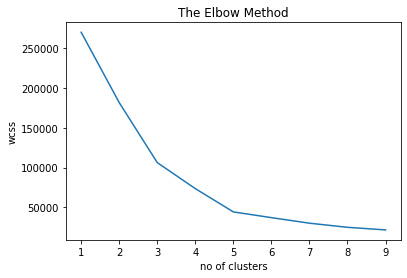

In [20]:
wcss=[]
k = range(1,10)
for i in k:
  kmodel = KMeans(n_clusters= i)
  kmodel.fit(X)
  wcss.append(kmodel.inertia_)

plt.plot(k, wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
k_means = KMeans(n_clusters= 5, init='k-means++', random_state=0)
Result = k_means.fit_predict(X)

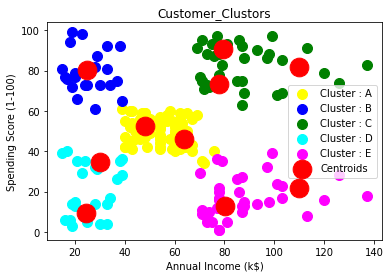

In [33]:
plt.scatter(X[Result == 0, 0], X[Result == 0, 1], s = 100, c = 'yellow', label = 'Cluster : A')
plt.scatter(X[Result == 1, 0], X[Result == 1, 1], s = 100, c = 'blue', label = 'Cluster : B')
plt.scatter(X[Result == 2, 0], X[Result == 2, 1], s = 100, c = 'green', label = 'Cluster : C')
plt.scatter(X[Result == 3, 0], X[Result == 3, 1], s = 100, c = 'cyan', label = 'Cluster : D')
plt.scatter(X[Result == 4, 0], X[Result == 4, 1], s = 100, c = 'magenta', label = 'Cluster : E')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 350, c = 'red', label = 'Centroids')
plt.title('Customer_Clustors')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()